## **Importing the libraries for preprocessing the data.**

In [2]:
import numpy 
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Importing the libraries for model building.**

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


As Data is a Univariate Time series dataset. So, here I took only "Feature" column for processing.

In [4]:
dataframe = pd.read_csv('train_csv.csv', usecols=[2], engine='python')
dataset = dataframe.values

In [5]:
dataframe

,feature
0,237.97
1,57.93
2,90.53
3,260.75
4,49.70
...,...
75,469.72
76,406.79
77,128.91
78,85.28


In [6]:
# MinMax scaling for 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
len(dataset)

80

In [8]:
# splitting the 80% training and 20% testing
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

64 16


## Here Sequences Data creation  is done with "no_seq" as number of sequence.

In [9]:
# function for pre processing data for RNN.
def create_dataset(dataset, no_seq=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-no_seq-1):
        a = dataset[i:(i+no_seq), 0]
        dataX.append(a)
        dataY.append(dataset[i + no_seq, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
# with number of sequence=1, splitting of data takes place. 
no_seq = 1
trainX, trainY = create_dataset(train, no_seq)
testX, testY = create_dataset(test, no_seq)

In [11]:
print(len(trainX),len(trainY))
print(len(testX),len(testY))

62 62
14 14


In [12]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

##  Model Building and Training.

In [13]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(1, no_seq)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
# replace verbose 0 to 1 to see the loss function performance.
model.fit(trainX, trainY, epochs=250, batch_size=32, verbose=0)

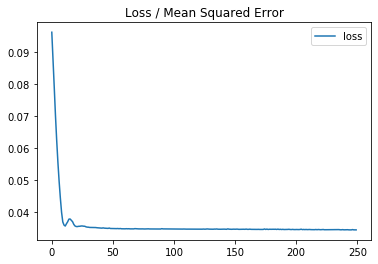

In [16]:
plt.title('Loss / Mean Squared Error')
plt.plot(model.history.history['loss'], label='loss')
plt.legend()
plt.show()

## Prediction and RMSE

In [17]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 83.17 RMSE
Test Score: 122.90 RMSE


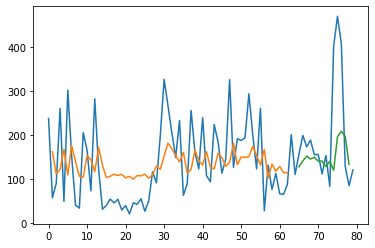

In [18]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[no_seq:len(trainPredict)+no_seq, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(no_seq*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Prediction for future dataset

In [19]:
inference_data = pd.read_csv('test_csv.csv')

No_test_data = len(inference_data)

# Number of features to be found.
print(No_test_data)

40


In [24]:
# Prediction taking the last dataset of train and predicting the rest 39 features.

for i in range(79, 79+No_test_data):
    
    # last day of the training dataset.
    if i == 79:
        last_day = dataframe[i:i+1].values
        last_day = scaler.transform(last_day)
        X_test = []
        X_test.append(last_day)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = model.predict(X_test)
        pred_price = scaler.inverse_transform(pred_price)
        print(pred_price)
        
    # rest 39 features.   
    else:
        last_day = pred_value
        last_day = scaler.transform(last_day)
        X_test = []
        X_test.append(last_day)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = model.predict(X_test)
        pred_price = scaler.inverse_transform(pred_price)
        print(pred_price)
        
    # replacing the old prediction value with new for next feature prediction.
    pred_value = pred_price

[[131.32393]]
[[134.24103]]
[[135.0666]]
[[135.29958]]
[[135.36526]]
[[135.38379]]
[[135.389]]
[[135.39049]]
[[135.3909]]
[[135.39102]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
[[135.39104]]
